In [1]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
import dataframe_image as dfi

In [2]:
output_folder = 'FINAL/final1/clustering/'

In [3]:
hf = pd.read_csv('FINAL/final1/clustering/hourly_featuremap.csv',index_col = 0)
qf = pd.read_csv('FINAL/final1/clustering/15min_featuremap_renamed.csv',index_col = 0)

In [4]:
# clustering begins!!

In [5]:
hr =  np.arange(0,96)

In [6]:
hr = hr/4
hr

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
       20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
       22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75])

In [7]:
def duplicates(lst, item):
    return [i for i, x in enumerate(lst) if x == item]

#have to change the value of the loop iter acc to the number of clusters i*j = num_clusters and also at plt.subplots

def plot_som_series_dba_center(X_train, y_pred, title,filename,hr):
    yi = list(np.unique(y_pred))
    fig, axs = plt.subplots(3,1,figsize=(9,15))
    plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)
    fig.suptitle(title,fontsize=21)
    i = 0
    for x in range(3):
        for y in range(1):
            cluster = (x)
            print(cluster)
            ll = duplicates(y_pred,yi[i])
            print(ll)
            i = i+1
            for ind in ll:
                series = X_train[ind]
                axs[cluster].plot(hr,series,c="gray",alpha=0.5) 
                axs[cluster].plot(hr,dtw_barycenter_averaging(np.vstack(X_train[ll])),c="blue") # I changed this part
            cluster_number = i
            lh = len(ll)
            axs[cluster].set_title(f"Cluster {cluster_number}: {lh} households",fontsize=18)
            axs[cluster].set_xlabel('Hour of the day',fontsize=15)
            axs[cluster].set_ylabel('Probability of AC usage',fontsize=15)
            axs[cluster].xaxis.set_ticks([0,3,6,9,12,15,18,21,24])        
            axs[cluster].tick_params(axis='x', labelsize=15)
            axs[cluster].tick_params(axis='y', labelsize=15)

    plt.show()
    fig.savefig(output_folder+filename,dpi=500) # uncomment this if you want to save the plot

In [8]:
np.linspace(0, 24, num=24)

array([ 0.        ,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])

In [9]:
qf_t = qf.T
hf_t = hf.T
df19 = qf_t


In [10]:
qf

,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,...,M05,M06,M07,M08,M09,M10,M11,M12,M13,M14
00:00:00,20.000000,93.333333,96.666667,89.285714,100.000000,89.285714,92.307692,80.000000,77.777778,100.000000,...,0.000000,100.000000,80,100.000000,87.5,100.000000,85.714286,100.000000,25.000000,100.000000
00:15:00,10.000000,80.000000,86.666667,75.000000,96.428571,71.428571,84.615385,66.666667,44.444444,75.000000,...,0.000000,93.103448,60,95.833333,87.5,92.857143,60.714286,78.260870,12.500000,100.000000
00:30:00,10.000000,83.333333,90.000000,78.571429,92.857143,71.428571,76.923077,63.333333,55.555556,75.000000,...,0.000000,89.655172,60,91.666667,87.5,92.857143,64.285714,82.608696,12.500000,100.000000
00:45:00,10.000000,76.666667,90.000000,75.000000,100.000000,60.714286,69.230769,60.000000,55.555556,83.333333,...,0.000000,96.551724,55,83.333333,75.0,92.857143,67.857143,86.956522,12.500000,100.000000
01:00:00,10.000000,76.666667,90.000000,75.000000,92.857143,60.714286,73.076923,60.000000,66.666667,100.000000,...,0.000000,96.551724,45,75.000000,75.0,92.857143,67.857143,86.956522,12.500000,95.238095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,23.333333,86.666667,93.333333,82.142857,53.571429,75.000000,76.923077,63.333333,66.666667,41.666667,...,4.166667,79.310345,75,95.833333,50.0,100.000000,92.857143,73.913043,25.000000,95.238095
23:00:00,16.666667,83.333333,93.333333,78.571429,67.857143,96.428571,80.769231,66.666667,77.777778,50.000000,...,4.166667,89.655172,70,91.666667,75.0,96.428571,96.428571,78.260870,20.833333,85.714286
23:15:00,16.666667,83.333333,93.333333,75.000000,85.714286,96.428571,84.615385,66.666667,66.666667,41.666667,...,0.000000,96.551724,70,91.666667,62.5,96.428571,89.285714,78.260870,16.666667,90.476190
23:30:00,16.666667,83.333333,93.333333,75.000000,89.285714,89.285714,84.615385,63.333333,66.666667,58.333333,...,0.000000,93.103448,65,91.666667,75.0,89.285714,67.857143,78.260870,16.666667,95.238095


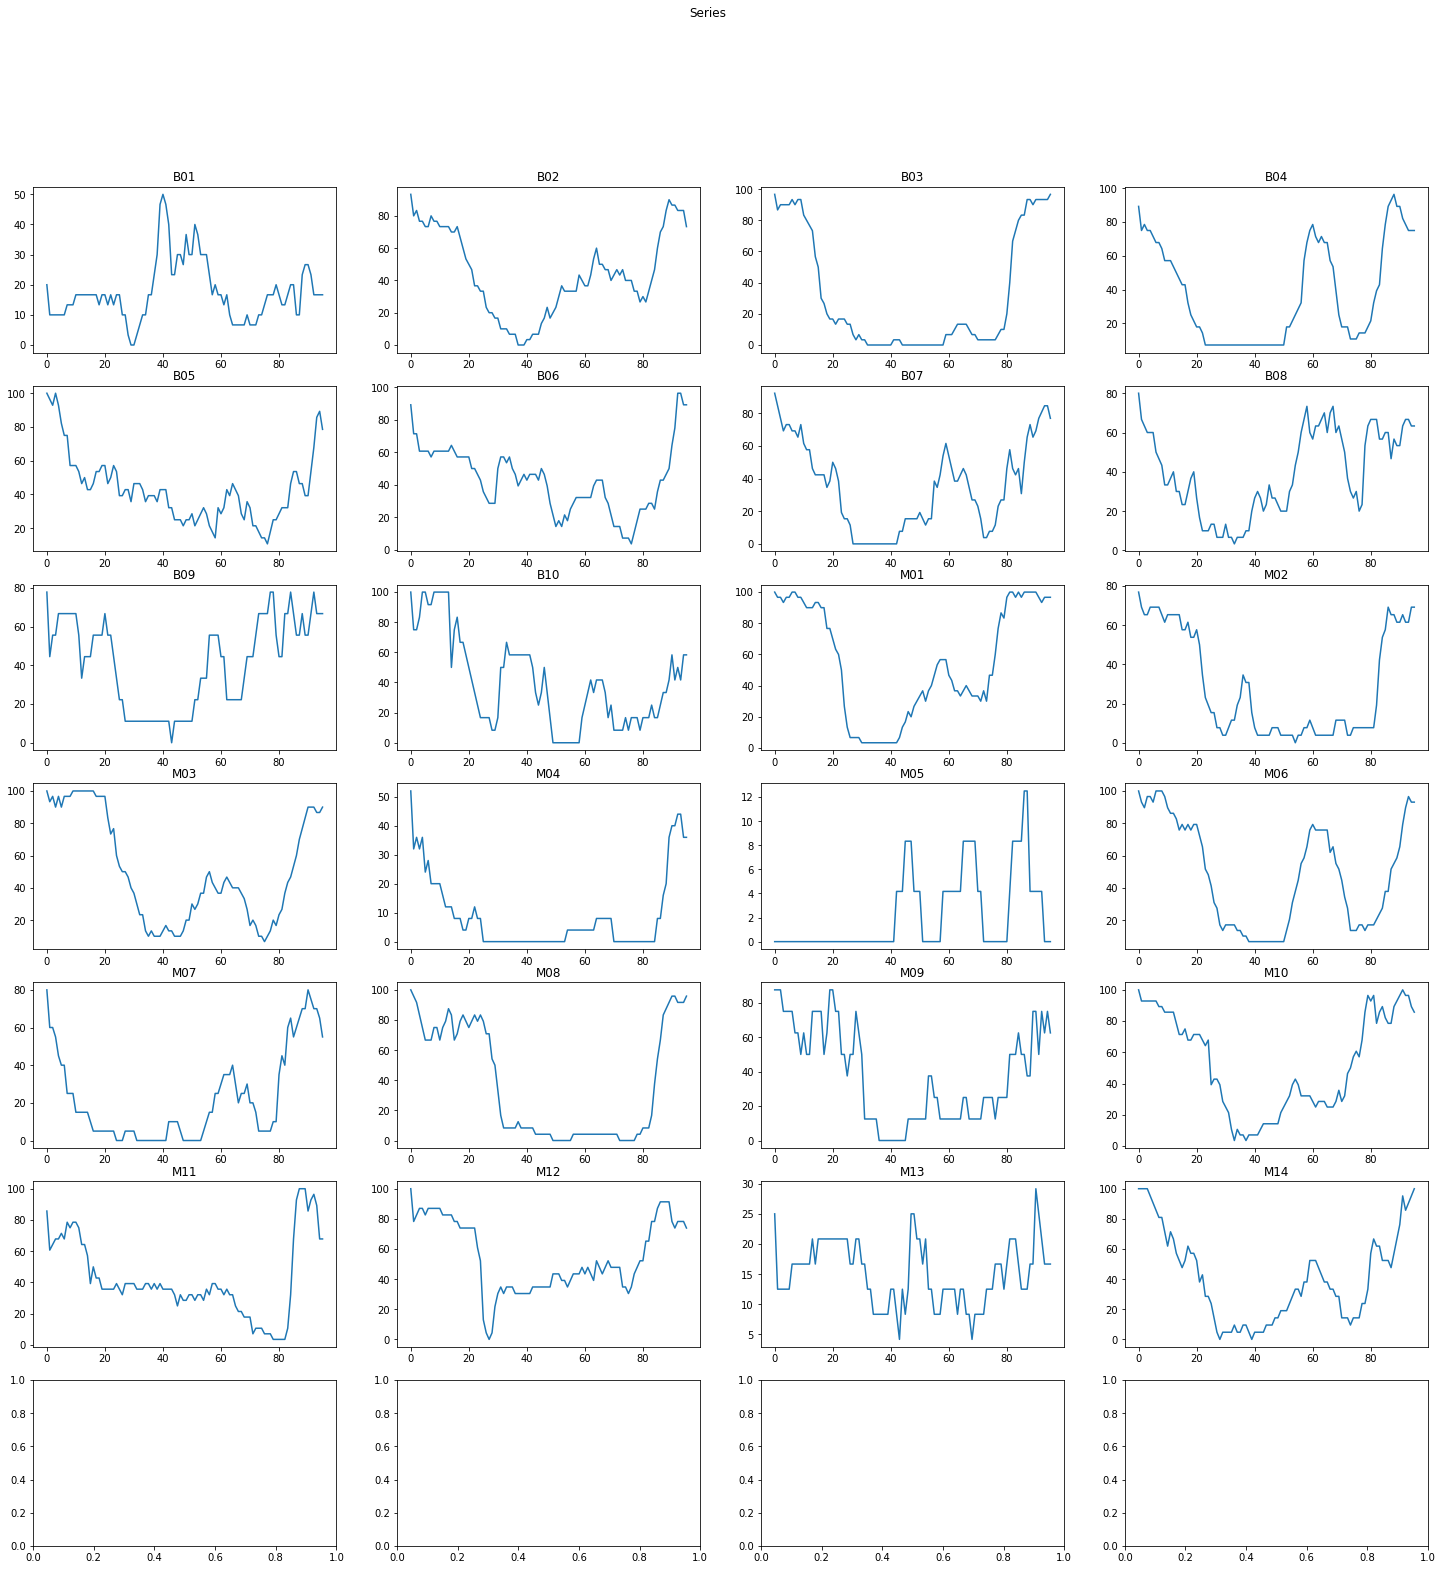

In [11]:
# plot individual curves
df19 = qf

mySeries = []
names = []
for col in list(df19.columns):
    mySeries.append(df19[col])
    names.append(col)
    
    
fig, axs = plt.subplots(7,4,figsize=(25,25))
fig.suptitle('Series')
for i in range(7):
    for j in range(4):
        if i*4+j+1>len(mySeries): # pass the others that we can't fill
            continue
        axs[i, j].plot(mySeries[i*4+j].values)
        axs[i, j].set_title(names[i*4+j])
plt.show()

Soft-DTW k-means


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.5s finished


6565.676 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2954.783 --> 2953.539 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2952.926 --> 2952.523 --> 

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2952.195 --> 2951.911 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2951.737 --> 2951.590 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2951.522 --> 2951.191 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2950.981 --> 2950.955 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2950.354 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2945.240 --> 2942.695 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2942.380 --> 2941.740 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.663 --> 2941.635 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2941.612 --> 2941.581 --> 

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.561 --> 2941.537 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.520 --> 2941.499 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.485 --> 2941.469 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.458 --> 2941.449 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.441 --> 2941.434 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.429 --> 2941.424 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.420 --> 2941.417 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.414 --> 2941.412 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.410 --> 2941.408 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.407 --> 2941.406 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.405 --> 2941.404 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.404 --> 2941.403 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.403 --> 2941.402 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


2941.402 --> 2941.402 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


0
[0, 13, 14, 22]
1
[1, 2, 3, 4, 5, 10, 12, 15, 17, 19, 21, 23]
2
[6, 7, 8, 9, 11, 16, 18, 20]


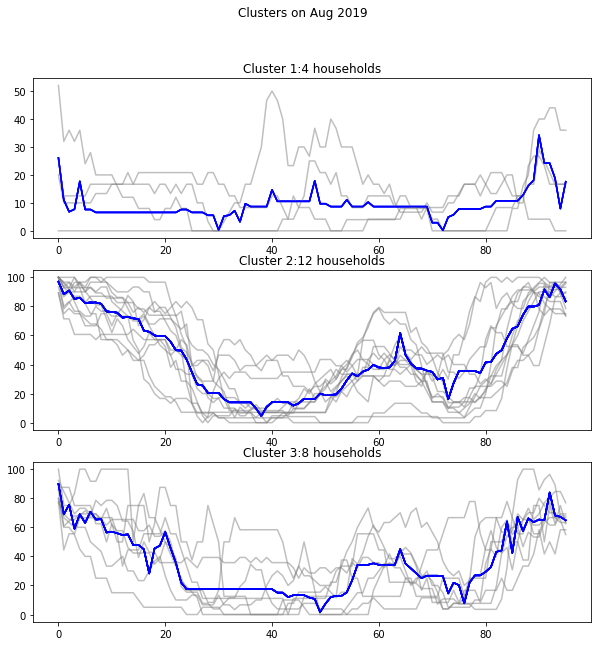

In [6]:
copy19 = df19
seed = 1
print("Soft-DTW k-means")
X_train = np.array(df19)
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           dtw_inertia=True,
                           metric_params={"gamma": 1.5},
                           verbose=True)
y_pred = sdtw_km.fit_predict(df19)

yi = list(np.unique(y_pred))
fig = plot_som_series_dba_center(X_train, y_pred,'Clusters on Aug 2019', 'clusters2019_softdtw.png')
copy19['cluster'] = y_pred

In [140]:
y_pred = np.array([3,1,2,1,2,2,1,1,1,2,1,2,1,3,3,1,1,2,2,1,2,1,3,1])

0
[1, 3, 6, 7, 8, 10, 12, 15, 16, 19, 21, 23]
1
[2, 4, 5, 9, 11, 17, 18, 20]
2
[0, 13, 14, 22]


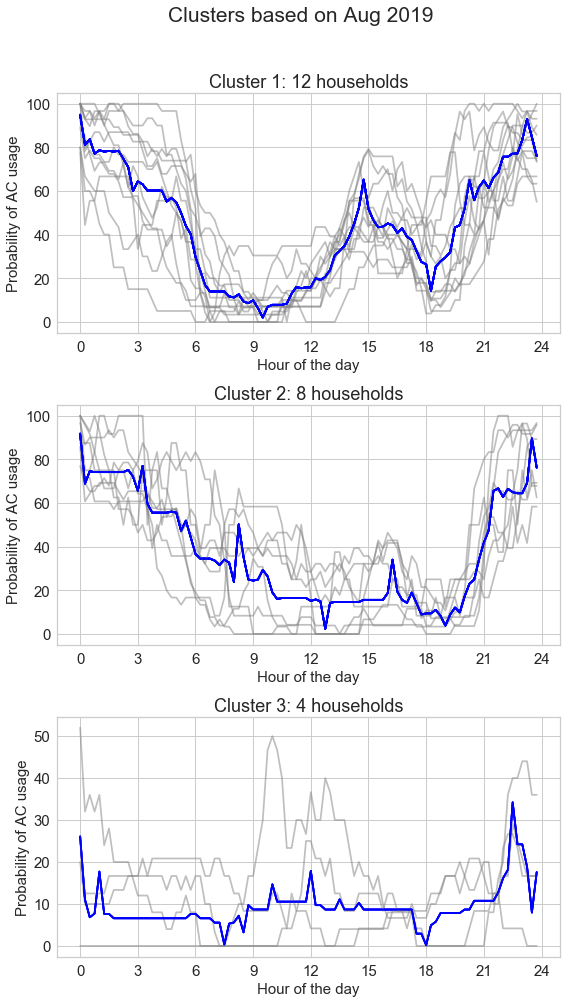

In [142]:
copy19 = df19
yi = list(np.unique(y_pred))
fig = plot_som_series_dba_center(X_train, y_pred,'Clusters based on Aug 2019', 'clusters2019_softdtw.pdf',hr)
copy19['cluster'] = y_pred

In [62]:
hr

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
       20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
       22.5 , 22.75, 23.  , 23.25, 23.5 ])

In [143]:
# !pip install scikit-learn
# !pip install yellowbrick
copy19.to_csv(output_folder+'clusters.csv')

In [91]:
# Calinski Harabasz Score for K means# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = TimeSeriesKMeans(metric="softdtw",metric_params={"gamma": 2.1},dtw_inertia=True)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='calinski_harabasz', timings= True)
visualizer.fit(qf_t)        # Fit the data to the visualizer
visualizer.show() 

KeyboardInterrupt: 

In [148]:
from sklearn.metrics import davies_bouldin_score

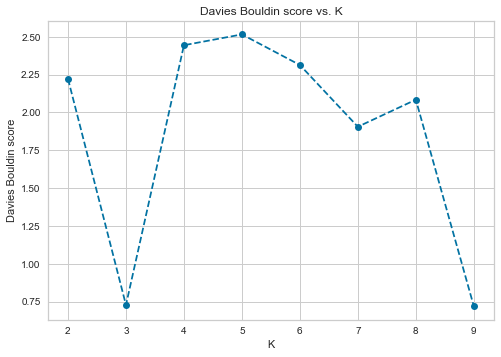

In [149]:

    
def get_kmeans_score(data, center):

    kmeans = TimeSeriesKMeans(metric="softdtw",metric_params={"gamma":2.1},dtw_inertia=True)# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(df19)
    score = davies_bouldin_score(df19, model)
    
    # Calculate Davies Bouldin scorescore = davies_bouldin_score(cluster_df, model)
    
    return score
scores = []
centers = list(range(2,10))
for center in centers:
    scores.append(get_kmeans_score(df19, center))
    
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');
plt.savefig(output_folder+'DBI.png',bbox_inches='tight',dpi=300)

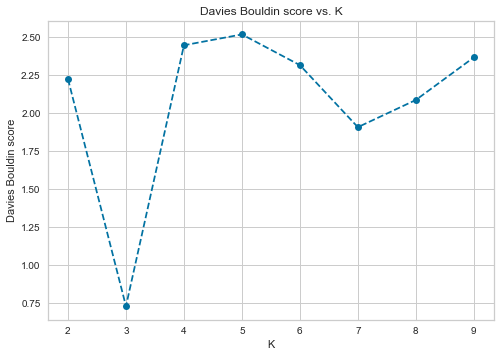

In [157]:
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');
plt.savefig(output_folder+'plots/DBI.pdf',bbox_inches='tight',dpi=300)

In [155]:
scores[7] = 2.364

In [64]:
import random
from copy import deepcopy
from scipy import interpolate
import numpy as np
from dtaidistance import dtw
import matplotlib.pyplot as pltfrom 
from _plotly_future_ import v4_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [63]:
!pip install dtaidistance

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for dtaidistance: filename=dtaidistance-2.2.5-cp37-cp37m-win_amd64.whl size=807263 sha256=c4facf3da7b4315fd647a1679b0854e701b768f66bb569f5b1ab0066117e0410
  Stored in directory: c:\users\rachna\appdata\local\pip\cache\wheels\43\2a\9c\917e2e688946efce68fc12d1f0cfe8cadabdf0791e67bf36d8
Successfully built dtaidistance


In [14]:
df19

,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,...,M05,M06,M07,M08,M09,M10,M11,M12,M13,M14
00:00:00,20.000000,93.333333,96.666667,89.285714,100.000000,89.285714,92.307692,80.000000,77.777778,100.000000,...,0.000000,100.000000,80,100.000000,87.5,100.000000,85.714286,100.000000,25.000000,100.000000
00:15:00,10.000000,80.000000,86.666667,75.000000,96.428571,71.428571,84.615385,66.666667,44.444444,75.000000,...,0.000000,93.103448,60,95.833333,87.5,92.857143,60.714286,78.260870,12.500000,100.000000
00:30:00,10.000000,83.333333,90.000000,78.571429,92.857143,71.428571,76.923077,63.333333,55.555556,75.000000,...,0.000000,89.655172,60,91.666667,87.5,92.857143,64.285714,82.608696,12.500000,100.000000
00:45:00,10.000000,76.666667,90.000000,75.000000,100.000000,60.714286,69.230769,60.000000,55.555556,83.333333,...,0.000000,96.551724,55,83.333333,75.0,92.857143,67.857143,86.956522,12.500000,100.000000
01:00:00,10.000000,76.666667,90.000000,75.000000,92.857143,60.714286,73.076923,60.000000,66.666667,100.000000,...,0.000000,96.551724,45,75.000000,75.0,92.857143,67.857143,86.956522,12.500000,95.238095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,23.333333,86.666667,93.333333,82.142857,53.571429,75.000000,76.923077,63.333333,66.666667,41.666667,...,4.166667,79.310345,75,95.833333,50.0,100.000000,92.857143,73.913043,25.000000,95.238095
23:00:00,16.666667,83.333333,93.333333,78.571429,67.857143,96.428571,80.769231,66.666667,77.777778,50.000000,...,4.166667,89.655172,70,91.666667,75.0,96.428571,96.428571,78.260870,20.833333,85.714286
23:15:00,16.666667,83.333333,93.333333,75.000000,85.714286,96.428571,84.615385,66.666667,66.666667,41.666667,...,0.000000,96.551724,70,91.666667,62.5,96.428571,89.285714,78.260870,16.666667,90.476190
23:30:00,16.666667,83.333333,93.333333,75.000000,89.285714,89.285714,84.615385,63.333333,66.666667,58.333333,...,0.000000,93.103448,65,91.666667,75.0,89.285714,67.857143,78.260870,16.666667,95.238095
